## Iterables vs. Iterators vs. Generators

Occasionally I've run into situations of confusion on the exact differences between the following related concepts in Python:


    a container
    an iterable
    an iterator
    a generator
    a generator expression
    a {list, set, dict} comprehension


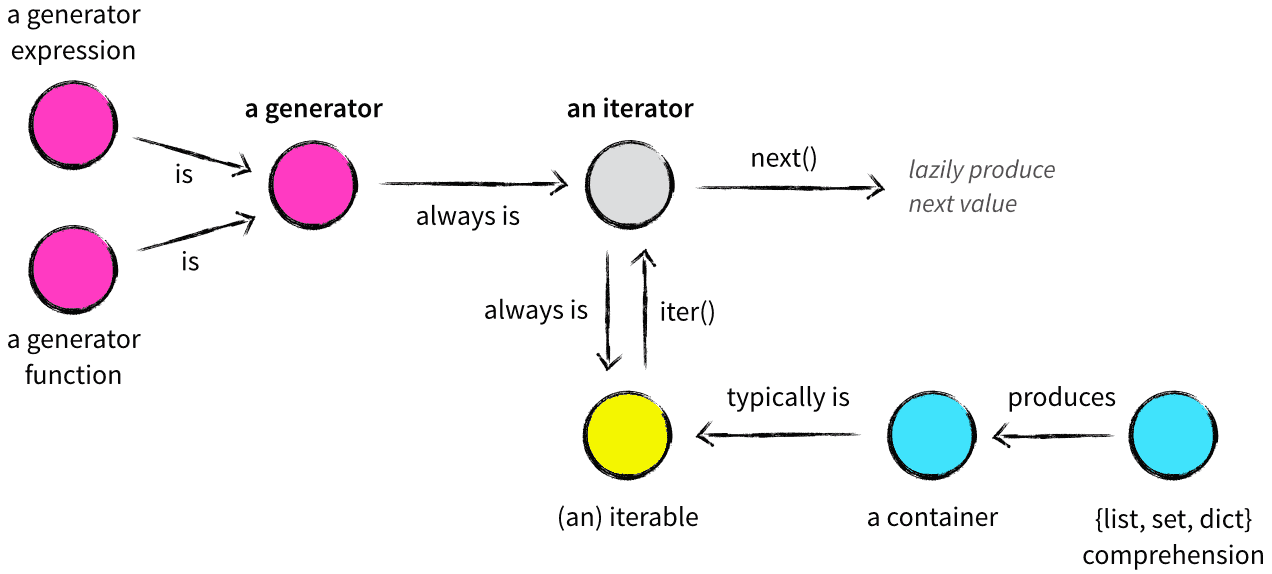

## Containers

**Containers are data structures holding elements, and that support membership tests**. They are data structures that live in memory, and typically hold all their values in memory, too. In Python, some well known examples are:

    list, deque, …
    set, frozensets, …
    dict, defaultdict, OrderedDict, Counter, …
    tuple, namedtuple, …
    str

Containers are easy to grasp, because you can think of them as real life containers: i.e. a box

Technically, an object is a container when it can be asked whether it contains a certain element. You can perform such **membership tests** on lists, sets, or tuples alike:

In [2]:
assert 1 in [1, 2, 3]      # lists

In [3]:
assert 4 not in [1, 2, 3]

In [4]:
assert 1 in {1, 2, 3}      # sets

In [5]:
assert 4 not in {1, 2, 3}

In [6]:
assert 1 in (1, 2, 3)      # tuples

In [7]:
assert 4 not in (1, 2, 3)

Dict membership will check the keys:

In [9]:
d = {1: 'foo', 2: 'bar', 3: 'qux'}
assert 1 in d
assert 4 not in d
assert 'foo' not in d  # 'foo' is not a _key_ in the dict

Finally you can ask a string if it "contains" a substring:

In [10]:
s = 'foobar'
assert 'b' in s
assert 'x' not in s
assert 'foo' in s  # a string "contains" all its substrings

## Iterables

As said, most containers are also iterable. An iterable may represent a finite or infinite source of data.

An **iterable** is any object, not necessarily a data structure, that can return an **iterator** (with the purpose of returning all of its elements). 

There is an important difference between an iterable and an iterator. Take a look at this example:

In [8]:
# list is a container, an iterable that returns an 
# iterator of <class 'list_iterator'> instance
my_list = [1, 2, 3]
print('__iter__' in dir(my_list)) # list is an iterable
iterator = iter(my_list)
print('__iter__' in dir(iterator)) # an iterator is iterable
print(iterator == iter(iterator))  # iterator returns itself as iterator

True
True
True


In [4]:
iterator1 = iter(my_list)
iterator2 = iter(my_list)
print(next(iterator1)) # 1
print(next(iterator1)) # 2
print(next(iterator2)) # 1
print(type(my_list))
print(type(iterator1))

1
2
1
<class 'list'>
<class 'list_iterator'>


Here, my_list is the iterable, while iterator1 and iterator2 are two individual iterator instances, producing values from the iterable my_list. Both iterators hold state, as you can see from the example. In this example, my_list is a data structure (a list), but that is not a requirement.

In [1]:
class MyListIter:
    def __init__(self, my_list):
        self.my_list = my_list
        self.index = 0

    def __iter__(self):  # an iterator always is a iterable
        return self

    def __next__(self):
        if self.index < len(self.my_list):
            value = self.my_list[self.index]
            self.index += 1
            return value
        else:
            raise StopIteration


class MyList:
    def __init__(self, lst):
        self.lst = lst

    def __len__(self):
        return len(self.lst)

    def __getitem__(self, item):  # to make MyList index-able
        return self.lst.__getitem__(item)

    def __iter__(self):
        return MyListIter(self)  # returns an iterator which has its own class


if __name__ == '__main__':
    my_list = MyList([1, 2, 3])  # an iterable
    iterator = iter(my_list)    # iterable returns an iterator

    iterator2 = iter(iterator)  # an iterator is also an iterable
    print(iterator == iterator2)

    print(iterator)             # <__main__.MyListIter object at 0x7fc7aa139390>
    print(next(iterator))       # 1
    print(next(iterator))       # 2
    print(next(iterator))       # 3
    print(next(iterator))       # StopIteration error



True
1
2
3


StopIteration: 

## For loops with iterables

When you write:

In [11]:
my_list = [1, 2, 3]
for element in my_list:
    print(element)

1
2
3


This is what actually happens:

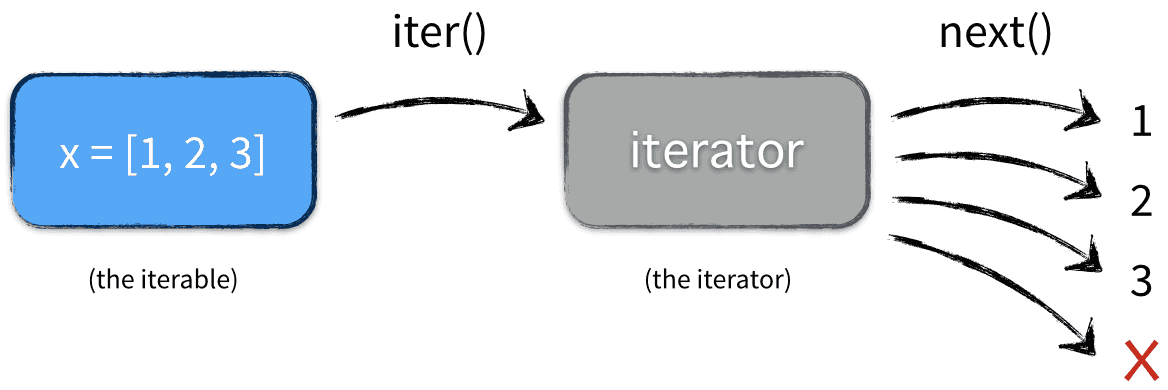

The for loop in cell 11 is implemented by Python as follows:

In [12]:
iterator = iter(my_list)
while True:
    try:
        element = next(iterator)
    except StopIteration:
        break
    else:
        print(element)

1
2
3


## Iterators

So an **iterator is a value factory**. Each time you ask it for "the next" value, it knows how to compute it because it holds internal state.

There are countless examples of iterators. **All of the itertools functions return iterators**. 

Some itertools functions produce infinite sequences:

In [13]:
from itertools import count
iterator = count(start=13)
print(next(iterator))
print(next(iterator)) # and so on..

13
14


Some itertools functions produce infinite sequences from finite sequences:

In [15]:
from itertools import cycle
colors = cycle(['red', 'white', 'blue'])

print(next(colors))
print(next(colors))
print(next(colors))
print(next(colors))
print(next(colors)) # and so on.. cyclic repetition happens

red
white
blue
red
white


Some itertools functions produce finite sequences from infinite sequences:

In [19]:
from itertools import islice, cycle
colors = cycle(['red', 'white', 'blue']) # infinite sequence

# islice documentation:
# (iterable: Iterable[_T], start: Optional[int], 
#            stop: Optional[int], step: Optional[int])
# Return an iterator whose next() method returns selected values 
# from an iterable. If start is specified, will skip all preceding 
# elements; otherwise, start defaults to zero. Step defaults to one. 
# If specified as another value, step determines how many values are 
# skipped between successive calls. 
# Works like a slice() on a list but returns an iterator.
limited_colors = islice(colors, 0, 4)    # finite sequence  
for color in limited_colors:
    print(color)

red
white
blue
red


## Building Our Own Iterator : Producing infinite Fibonacci Series

In [20]:
from itertools import islice

class fibonacci:
    def __init__(self):
        self.previous = 0
        self.current = 1
    
    def __iter__(self):
        return self
    
    def __next__(self):
        self.previous, self.current = self.current, self.previous+self.current
        return self.previous

if __name__ == '__main__':
    f = fibonacci() # an iterable
    iterator = islice(f,0,10)
    print(list(iterator))
    

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


The state inside this iterator is fully kept inside the prev and curr instance variables, and are used for subsequent calls to the iterator. Every call to next() does two important things:

    Modify its state for the next next() call;
    Produce the result for the current call.


**Central idea: iterator is a lazy factory**
From the outside, the iterator is a lazy factory that is idle until you ask it for a value, which is when it starts to buzz and produce a single value, after which it turns idle again.

## Generators

A generator is a special kind of iterator—the elegant kind

Let's be explicit:

    Any generator also is an iterator (not vice versa!);
    Any generator, therefore, is a factory that lazily produces values.

Here is the same Fibonacci sequence factory, but written as a generator:

In [21]:
from itertools import islice
def fibonacci_generator():
    previous, current = 0, 1
    while True:
        yield current
        previous, current = current, previous+current

if __name__ == '__main__':
    fg = fibonacci_generator()
    lst = list(islice(fg, 0, 10))
    print(lst)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


Let's break down what happened here: first of all, take note that **fibonacci_generator** is defined as a normal Python function, nothing special. Notice, however, that there's **no** **return** **keyword** inside the function body. The return value of the function will be a generator (read: an iterator, a factory, a stateful helper object).

Now when **fg = fibonacci_generator()** is called, the generator (the factory) is instantiated and returned. No code will be executed at this point: the generator **fg** starts in an idle state initially. To be explicit: the line previous, current = 0, 1 is not executed yet.

Then, this generator **fg** instance is wrapped in an islice(). This is itself also an generator, so idle initially. Nothing happens, still.

Then, this iterator is wrapped in a list(), which will consume all of its arguments and build a list from it. To do so, it will start calling next() on the islice() instance, which in turn will start calling next() on our **fg** instance.

But one step at a time. On the first invocation, the code will finally run a bit: **previous, current = 0, 1** gets executed, the while True loop is entered, and then it encounters the **yield current** statement. It will deliver the value that's currently in the **current** variable and does **a state suspension** (i.e. saves the local symbol table and the current execution point for the next **next(fg)** call)

This value is passed to the islice() wrapper, which will produce it (because it's not past the 10th value yet), and list can add the value 1 to the list now.

Then, it asks islice() for the next value, which will ask **fg** for the next value, which will "unpause" **fg** from its previous state, resuming with the statement **previous, current = current, previous + current.** Then it re-enters the next iteration of the while loop, and hits the yield curr statement, delivering the next value of current and do a state suspension again.

This happens until the output list is 10 elements long and when list() asks islice() for the 11th value, islice() will raise a **StopIteration** exception, indicating that the end has been reached, and list will return the result: a list of 10 items, containing the first 10 Fibonacci numbers. Notice that the **fibonacci** generator doesn't receive the 11th next() call. In fact, it will not be used again, and will be garbage collected later.

Lets implement the above explanation ourselves
(Refer to 11-Python Generators And Iterators > my_islice)

In [2]:
# a generator function that yields an infinite sequence
def fibonacci():
    previous, current = 0, 1
    while True:
        yield current
        previous, current = current, previous + current

# my_islice(iterable, stop) –> islice object
# my_islice(iterable, start, stop[, step]) –> islice object
# Return an iterator whose next() method returns selected values
# from an iterable. If start is specified, will skip all preceding elements;
# otherwise, start defaults to zero. Step defaults to one.
# If specified as another value, step determines how many values are
# skipped between successive calls. Works like a slice() on a list but
# returns an iterator.
def my_islice(*args):

    if len(args) < 2:
        msg = f'my_islice expected at least 2 arguments, got {len(args)}'
        raise TypeError(msg)
    if len(args) > 4:
        msg = f'my_islice expected at most 4 arguments, got {len(args)}'
        raise TypeError(msg)

    step = 1
    start = 0
    if len(args) == 2:
        iterable = args[0]
        stop = args[1]
    elif len(args) == 3:
        iterable = args[0]
        start = args[1]
        stop = args[2]
    elif len(args) == 4:
        iterable = args[0]
        start = args[1]
        stop = args[2]
        step = args[3]

    # verifications can be implemented for the values iterable,
    # start, stop and step here
    # but we assume they are fine

    # This is the core of what is explained in detail in above text
    current = start
    iterator = iter(iterable)
    while current < stop:
        yield next(iterator)
        current += step


if __name__ == '__main__':
    generator = fibonacci() # a generator that produces infinite sequence
    lst = list(my_islice(generator, 0, 10))  # a generator that produces finite sequence
    print(lst)


[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


## Types of Generators

There are two types of generators in Python: **generator functions** and **generator expressions**. A **generator function** is any function in which the keyword **yield** appears in its body. We just saw an example of that. The appearance of the keyword yield is enough to make the function a generator function.

Lets focus on generator expressions now. A generator expression is a generator equivalent of a list comprehension.

Lets give a couple of examples of list/dict/set comprehensions first. Note that they directly generate their corresponding data structure (i.e. a container) in memory. They do not create a generator.

List comprehension example:

In [3]:
numbers = [1, 2, 3, 4, 5, 6]
[x * x for x in numbers]

[1, 4, 9, 16, 25, 36]

A set comprehension

In [4]:
{x * x for x in numbers}

{1, 4, 9, 16, 25, 36}

A dict comprehension:

In [5]:
{x: x * x for x in numbers}

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36}

Now lets give a **generator expression** example. Note that unlike list/set/dict comprehensions, generator expressions do not create a container, instead they create a anonymous generator.

In [9]:
numbers = [1, 2, 3, 4, 5, 6]
lazy_squares = (x * x for x in numbers) # note this is not a tuple comprehension
print(lazy_squares)
print(next(lazy_squares))
list(lazy_squares)

<generator object <genexpr> at 0x7f4bd861f6d0>
1


[4, 9, 16, 25, 36]

Note that, because we read the first value from lazy_squares with next(), it's state is now at the "second" item, so when we consume it entirely by calling list(), that will only return the partial list of squares. (This is just to show the lazy behaviour.) 

## In conclusion

Generators are an incredible powerful programming construct. They allow you to write streaming code with fewer intermediate variables and data structures. Besides that, they are more memory and CPU efficient. Finally, they tend to require fewer lines of code, too.

Tip to get started with generators: find places in your code where you do the following:

def func():
    result = []
    for ... in ...:
        result.append(x)
    return result

And replace it by:

def iter_something():
    for ... in ...:
        yield x

In [11]:
# def something():  # Only if you really need a list structure
#     return list(iter_something())

## REFERENCES

[1] https://nvie.com/posts/iterators-vs-generators/